In [69]:
import pandas as pd
import numpy as np

from data_inspection import DataInspector, InspectingDatatypesStrategy, InspectingSummaryStatistics
from missing_values_analysis import MissingValuesReport
from univariate_analysis import UnivariateAnalysisExecutor, UnivariateNumericalAnalysis, UnivariateCategoricalAnalysis
from bivariate_analysis import BivariateAnalysisExecutor, NumericalWithNumericalAnalysis, CategoricalWithNumericalAnalysis
from multivariate_analysis import SimpleMultivariateStatisticalAnalysis


In [70]:
data_path = '../data_source/laptop_data_preprocessed.csv'
df = pd.read_csv(data_path)

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [72]:
data_inspector = DataInspector(InspectingDatatypesStrategy())
data_inspector.run_inspection(df)


Count of data types and non-null elements:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Weight       1302 non-null   float64
 4   Price        1302 non-null   int64  
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 132.4+ KB
None


In [73]:
data_inspector.configure_strategy(InspectingSummaryStatistics())
data_inspector.run_inspection(df)


Statistical Summary of numerical features:
               Ram       Weight          Price  Touchscreen         IPS  \
count  1302.000000  1302.000000    1302.000000  1302.000000  1302.00000   
mean      8.385561     2.039416   59888.555300     0.146697     0.27957   
std       5.085166     0.665274   37251.180578     0.353940     0.44896   
min       2.000000     0.690000    9270.000000     0.000000     0.00000   
25%       4.000000     1.500000   31914.000000     0.000000     0.00000   
50%       8.000000     2.040000   52107.500000     0.000000     0.00000   
75%       8.000000     2.300000   79303.500000     0.000000     1.00000   
max      64.000000     4.700000  324954.000000     1.000000     1.00000   

               ppi          HDD          SSD  
count  1302.000000  1302.000000  1302.000000  
mean    146.568497   414.101382   183.874040  
std      43.069016   515.889348   186.969314  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000 

# Data Inspection Summary — `laptop_data.xlsx`

## 1. Dataset Overview
- **Rows:** 1302 | **Columns:** 13  
- **Target Variable:** `Price`  
- **Index Column:** `Unnamed: 0` (auto-generated, to be dropped)  
- **Purpose:** Laptop price prediction based on technical specifications.

---

## 2. Data Composition
- **Numerical Features:** `Ram`, `Weight`, `Price`, `Touchscreen`, `IPS`, `ppi`, `HDD`, `SSD`  
- **Categorical Features:** `Company`, `TypeName`, `Cpu brand`, `Gpu brand`, `os`  
- **Data Quality:** No missing or duplicate values detected.  
- **Integrity:** Clean and consistent; ready for preprocessing.

---

## 3. Numerical Insights
- `Ram` averages around 8 GB, with values ranging from 2 GB – 64 GB.  
- `Weight` typically lies between 1.5 kg – 2.5 kg.  
- `Price` distribution is **right-skewed**, indicating a few high-end outliers.  
- Most laptops are **non-touchscreen**, though a small portion (~15%) have this feature.  
- Average **ppi (pixel density)** is around 146 — standard for Full HD displays.  
- `HDD` and `SSD` capacities vary widely, with many modern devices relying solely on SSD storage.

---

## 4. Categorical Insights
- **Brands:** 19 unique; **Dell** leads with the most entries.  
- **Laptop Type:** 6 types; **Notebook** dominates the dataset.  
- **CPU Brand:** Mostly **Intel Core i7** and **i5** variants.  
- **GPU Brand:** Primarily **Intel integrated graphics**, followed by Nvidia and AMD.  
- **Operating System:** Largely **Windows**, with minor representation for macOS and Linux variants.

---

## 5. Observations & Recommendations
1. **Data Quality:** Clean dataset — minimal preprocessing required.  
2. **Price Skewness:** Apply **log transformation** before regression modeling.  
3. **Feature Engineering Opportunities:**
   - Derive binary flags (e.g., SSD presence, touch support).  
   - Extract CPU generation and brand hierarchy (Intel vs AMD).  
   - Encode categorical variables using One-Hot or Ordinal encoding.  
4. **Outlier Handling:** Review very high `Price` values before model training.  
5. **Correlation Check:** Examine interdependence between `ppi`, `Weight`, and `Price` for feature relevance.

---

** Conclusion:**  
The dataset is well-structured, balanced, and ready for downstream **preprocessing**, **feature engineering**, and **model development**.


In [74]:
missing_values_processor = MissingValuesReport()
missing_values_processor.missing_values_analysis(df)


Missing Values Count by Column:
No missing values found.

No missing values to visualize.


## Missing Values Report

- There are 1303 records and no **missing values** found
- The dataset is completely clean and there will be no need of any other additional strategies to be performed on the dataset in case of missing data values

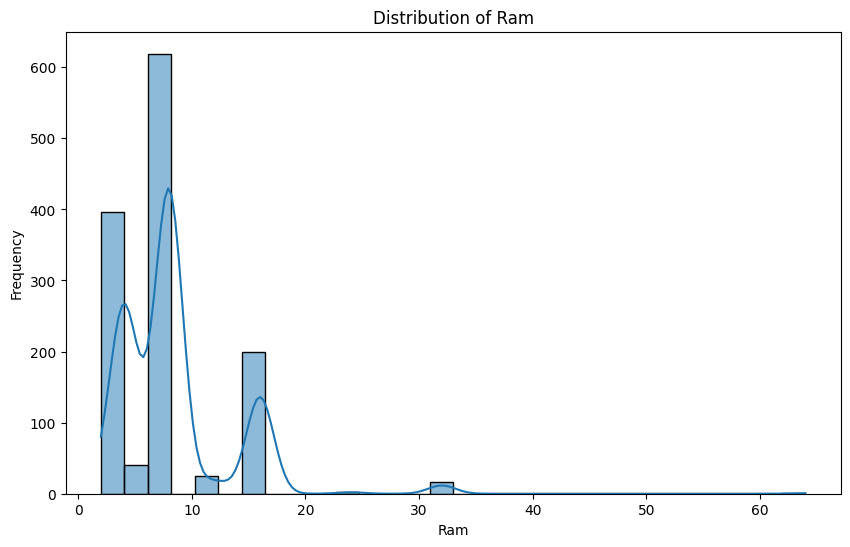

In [75]:
univariate_processor = UnivariateAnalysisExecutor(UnivariateNumericalAnalysis())
univariate_processor.run_analysis(df, 'Ram')

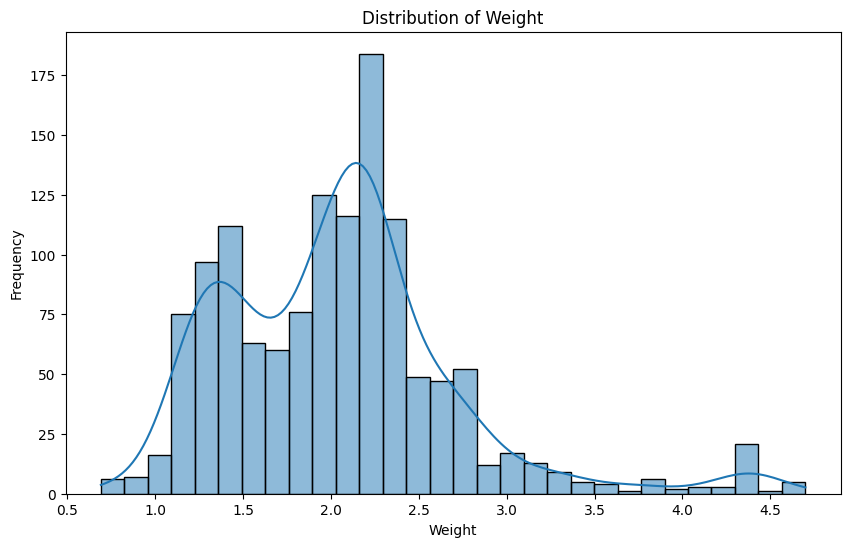

In [76]:
univariate_processor.run_analysis(df, 'Weight')

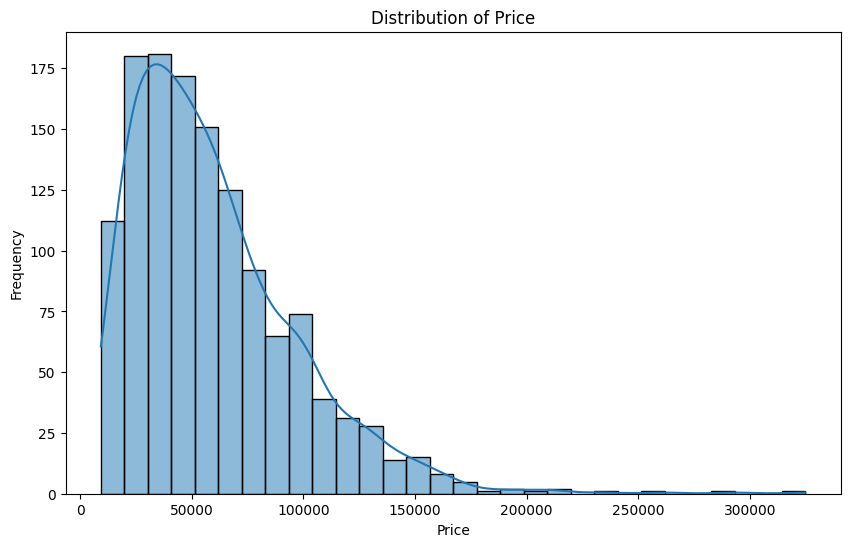

In [77]:
univariate_processor.run_analysis(df, 'Price')

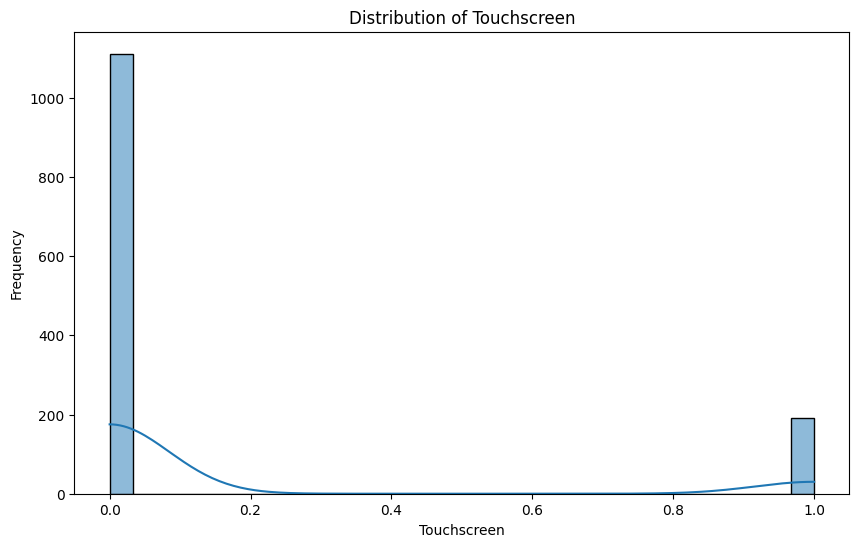

In [78]:
univariate_processor.run_analysis(df, 'Touchscreen')

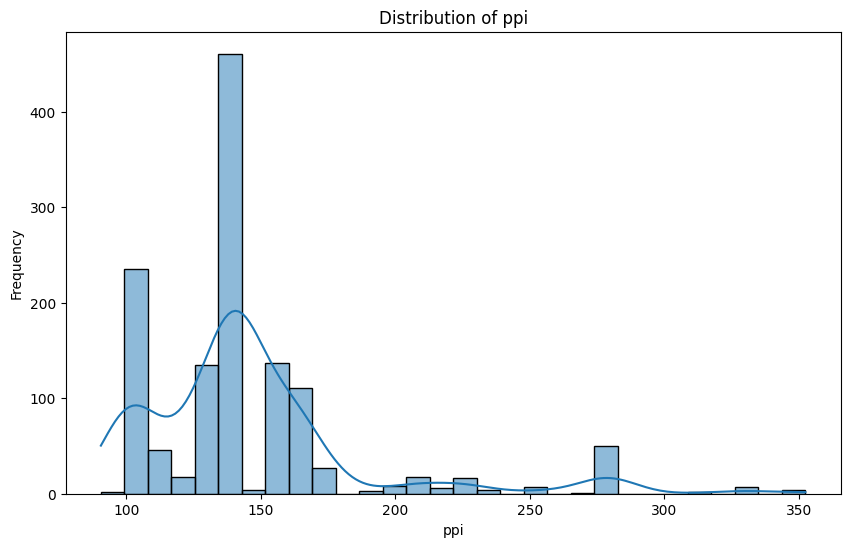

In [79]:
univariate_processor.run_analysis(df, 'ppi')

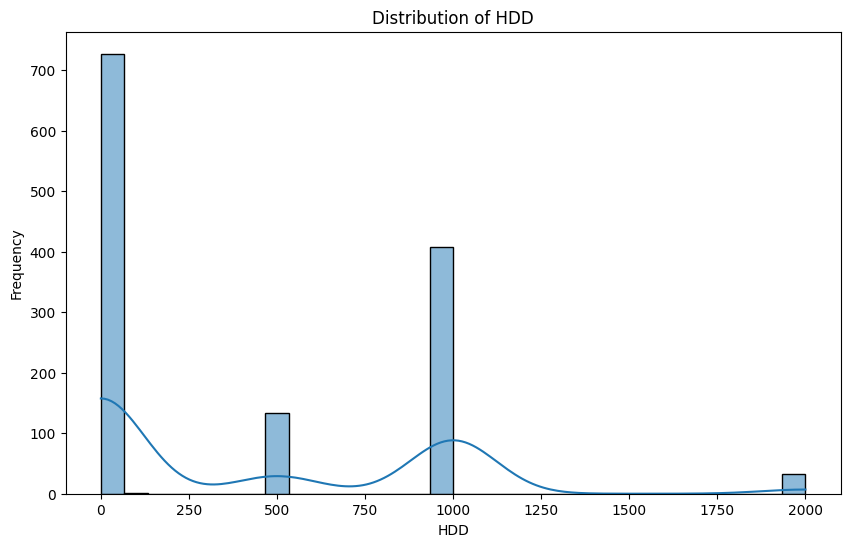

In [80]:
univariate_processor.run_analysis(df, 'HDD')

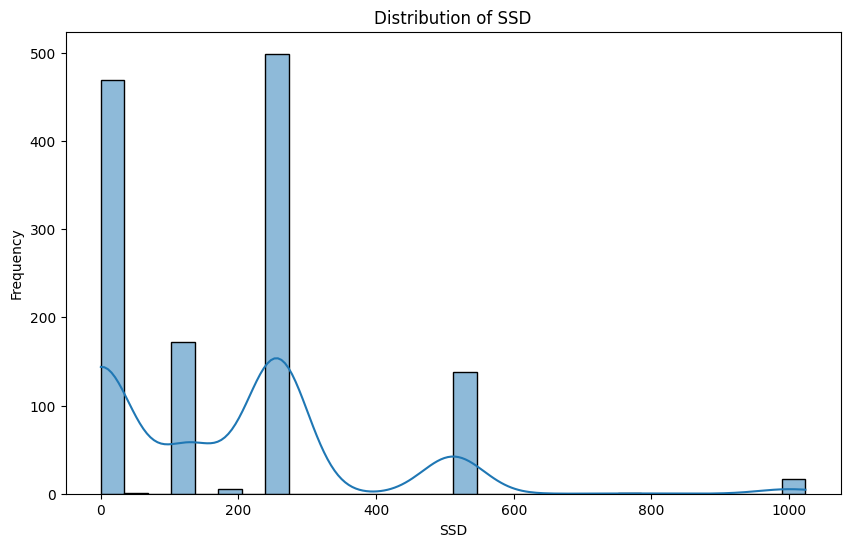

In [81]:
univariate_processor.run_analysis(df, 'SSD')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\exploratory_data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


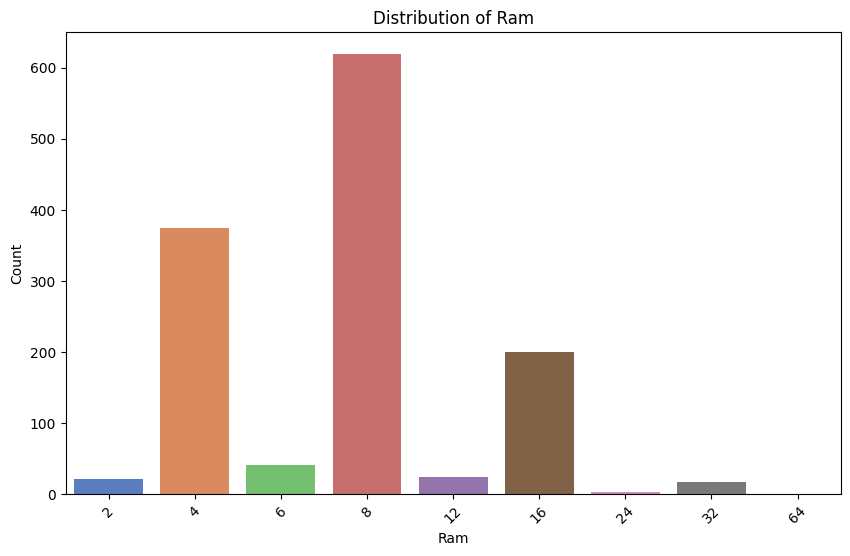

In [82]:
univariate_processor.configure_strategy(UnivariateCategoricalAnalysis())
univariate_processor.run_analysis(df, 'Ram')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\exploratory_data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


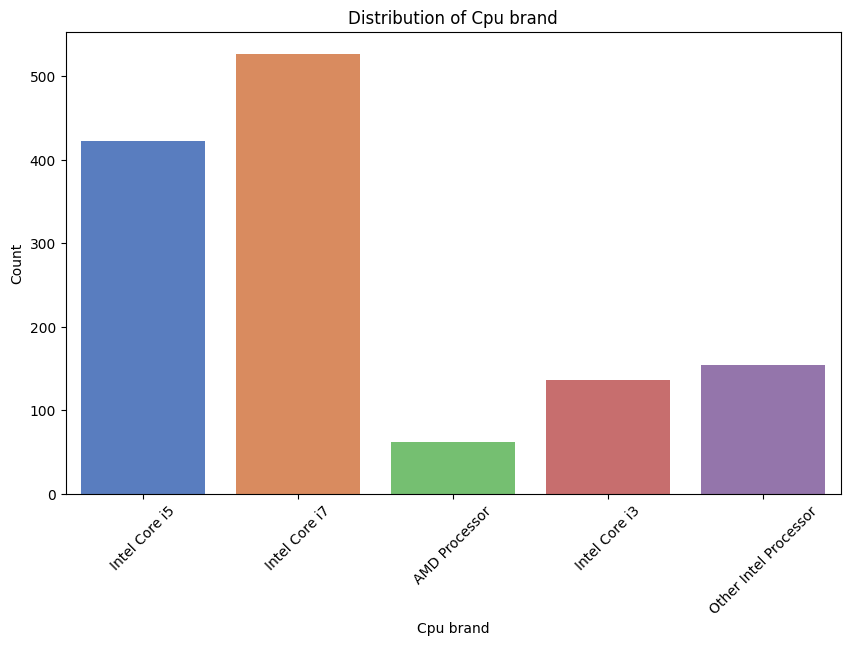

In [83]:
univariate_processor.run_analysis(df, 'Cpu brand')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\exploratory_data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


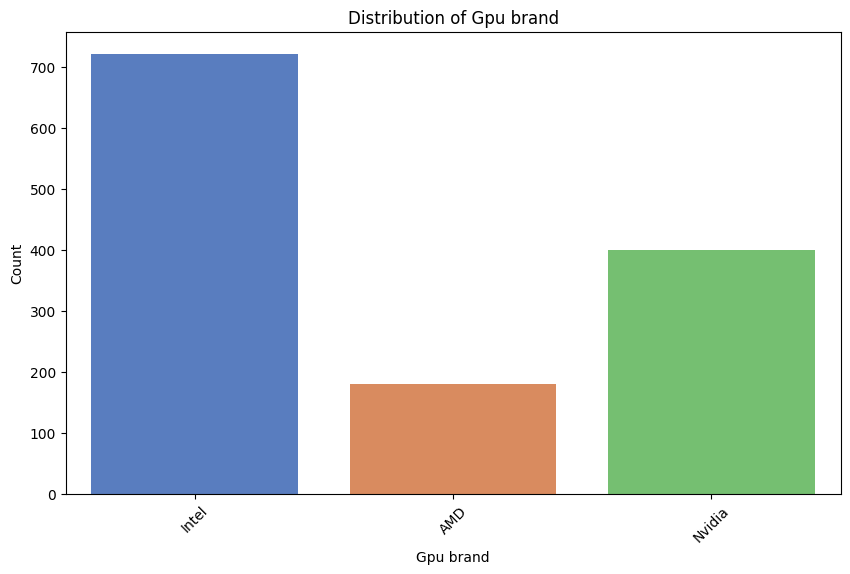

In [84]:
univariate_processor.run_analysis(df, 'Gpu brand')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\exploratory_data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


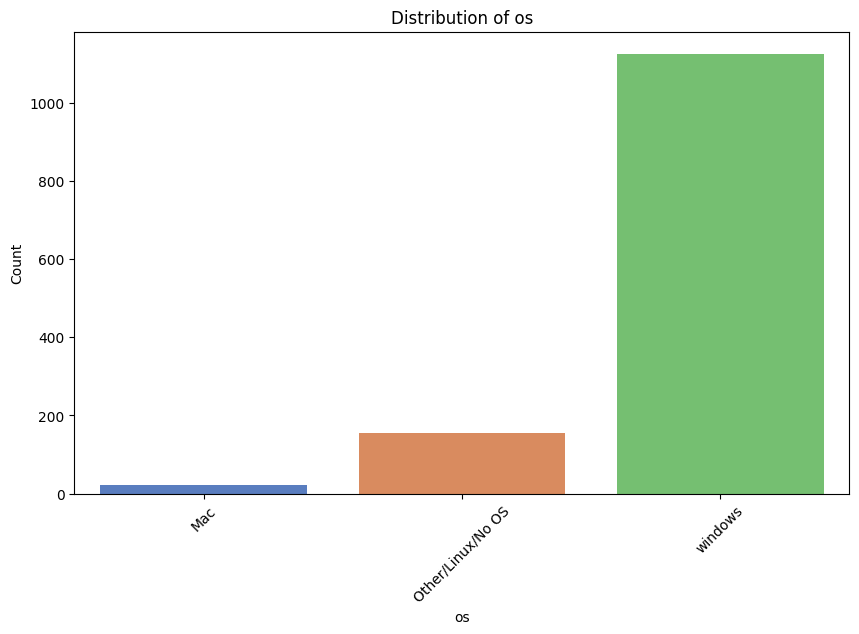

In [85]:
univariate_processor.run_analysis(df, 'os')

## Univariate Analysis Report — Laptop Dataset

### 1. Overview

Univariate Analysis focuses on **examining each variable individually** to understand its distribution, patterns, and dominant characteristics.  
It helps in identifying data imbalances, outliers, and feature significance — which are crucial for effective **feature engineering and model performance** in the Machine Learning pipeline.

---

### 2. Key Insights from Univariate Analysis

#### RAM Distribution
- The majority of laptops (~600+) have **8 GB RAM**, making it the most common configuration.  
- Around **400 laptops** are equipped with **4 GB RAM**.  
- Higher-end configurations like **16 GB (200 devices)** and **32 GB (20 devices)** are less frequent.  
- Extremely low or high configurations such as **24 GB (10 devices)** and **64 GB (<10 devices)** are rare.  

**Implication:**  
This shows that mid-range memory configurations dominate the dataset, and any ML model predicting price or performance should capture the non-linear impact of RAM on pricing.

---

#### Weight Distribution
- Most laptops weigh between **2.0 – 2.5 kg**.  
- Heavier devices (between **3.5 – 4.5 kg**) are very few.  

**Implication:**  
Weight correlates with form factor (Ultrabooks vs Gaming Laptops). The skewness towards mid-weight laptops suggests the dataset mainly represents consumer-grade devices.

---

#### Price Distribution
- ~**180 devices** are priced around **₹50,000**.  
- ~**175 devices** fall in the range **₹25,000 – ₹50,000**.  
- Very few (<5) laptops exceed **₹2,50,000**, and those near **₹30,000** are minimal.  

**Implication:**  
The price distribution is **right-skewed**, dominated by mid-range devices. This helps in defining appropriate scaling and potential log transformations for regression models.

---

#### Touchscreen Availability
- ~**1200 laptops** do **not** have a touchscreen.  
- ~**200 laptops** include **touchscreen** functionality.  

**Implication:**  
The dataset is imbalanced for this binary feature. This imbalance can impact classification models predicting touchscreen presence and must be handled via class weighting or sampling.

---

#### Pixel Density (PPI)
- Around **500 records** have a **PPI of 500** (higher-resolution displays).  
- Around **350 records** have **PPI ~350** (lower-end displays).  

**Implication:**  
PPI indicates display quality and significantly correlates with price. It can be a strong continuous predictor for premium device classification.

---

#### HDD Capacity
- ~**700 laptops** have **0 GB HDD** (pure SSD-based).  
- Around **2000 laptops** have HDDs around **30 GB** (approximation).  
- Nearly **400 laptops** feature **~1000 GB HDD**.  

**Implication:**  
The majority use SSDs or hybrid storage. HDD size variability suggests differences in legacy vs modern device segments.

---

#### SSD Capacity
- ~**500 laptops** feature **220 GB SSDs** (most common).  
- **~20 laptops** have **1000 GB SSDs**, marking the high end.  

**Implication:**  
SSD capacity distribution is skewed, representing more mid-range configurations. It strongly influences price prediction.

---

#### Processor (CPU) Type
- **Intel Core i7:** ~500 devices  
- **Intel Core i5:** ~400 devices  
- **AMD Processors:** ~150 devices  
- **Other processors:** ~170 devices  

**Implication:**  
The dominance of Intel processors indicates potential model bias. Encoding or balancing might be necessary during model training to avoid overfitting towards common CPU brands.

---

#### GPU Brand Distribution
- **Intel:** ~700 devices  
- **NVIDIA:** ~400 devices  
- **AMD:** ~200 devices  

**Implication:**  
GPU type strongly correlates with both price and performance tier. Feature encoding should preserve ordinal relationships between GPU classes.

---

#### Operating System
- **Windows:** ~1200 devices  
- **Mac:** ~10 devices  
- **Other/Linux/No OS:** ~200 devices  

**Implication:**  
The dataset is heavily skewed towards Windows laptops. This categorical imbalance should be handled via encoding techniques to prevent OS-based bias in model learning.

---

### Summary

This univariate analysis reveals:
- Heavy **central tendency** towards mid-tier specs (8 GB RAM, 2.0–2.5 kg, ~₹50,000).  
- **High skewness** in attributes like price, storage, and OS.  
- **Significant imbalances** in categorical features such as CPU type and Touchscreen availability.

These insights are foundational for subsequent **bivariate analysis**, **feature engineering**, and **predictive modeling** — ensuring robust, unbiased, and interpretable ML outcomes.

---


### Bivariate Analysis

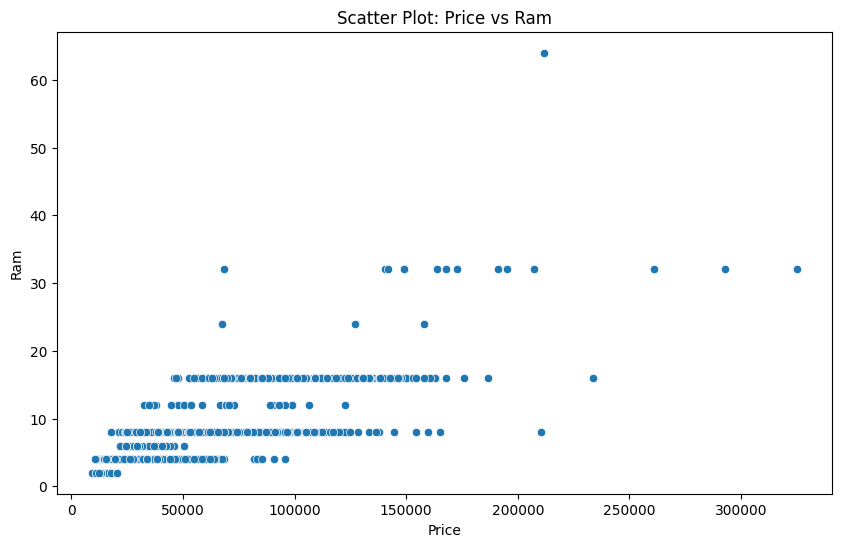

In [86]:
bivariate_processor = BivariateAnalysisExecutor(NumericalWithNumericalAnalysis())
bivariate_processor.run_analysis(df, 'Price', 'Ram')

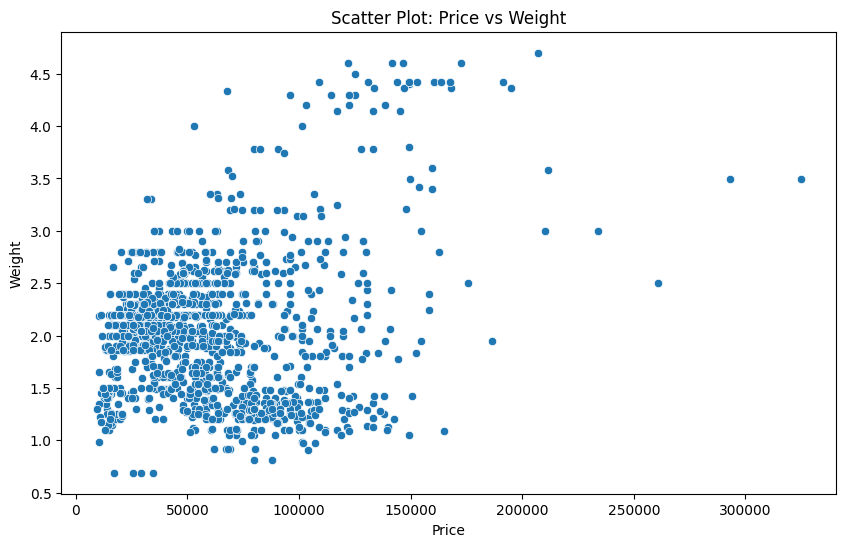

In [87]:
bivariate_processor.run_analysis(df, 'Price', 'Weight')

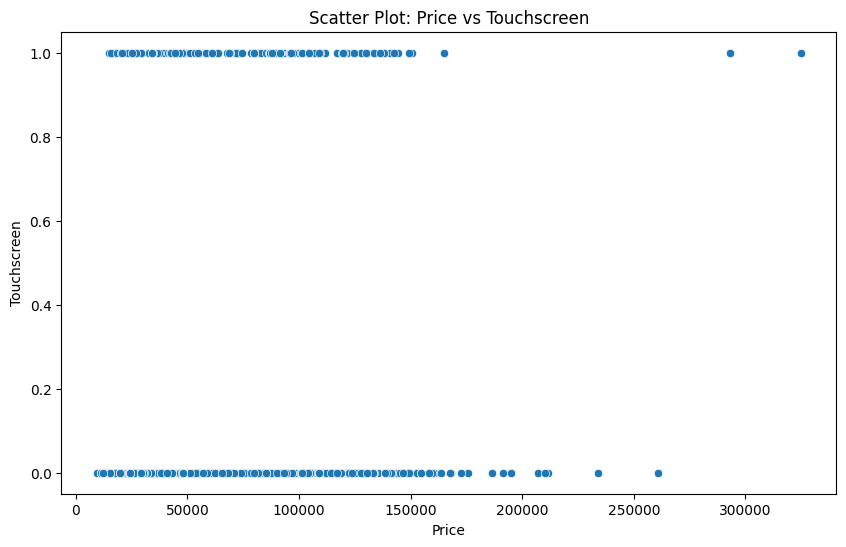

In [88]:
bivariate_processor.run_analysis(df, 'Price', 'Touchscreen')

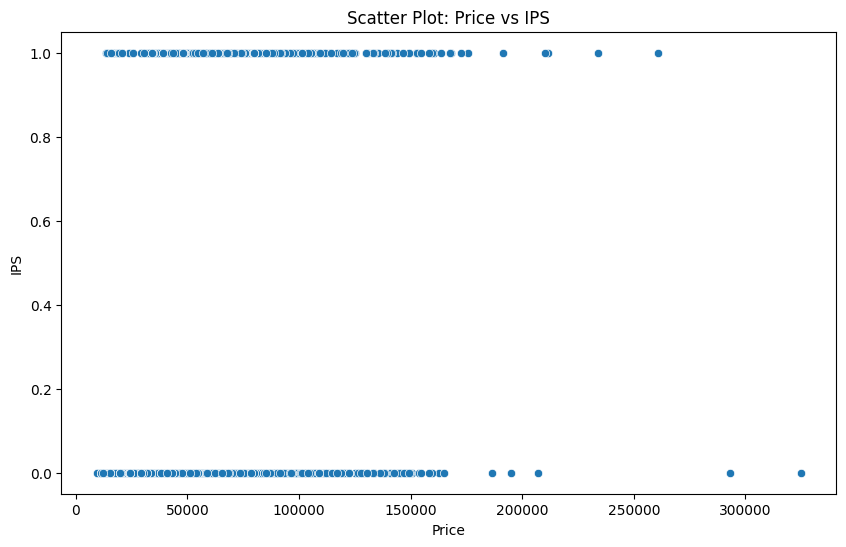

In [89]:
bivariate_processor.run_analysis(df, 'Price', 'IPS')

In [90]:
bivariate_processor.run_analysis(df, 'Cpu brand', 'Price')

Both 'Cpu brand' and 'Price' must be numerical features.


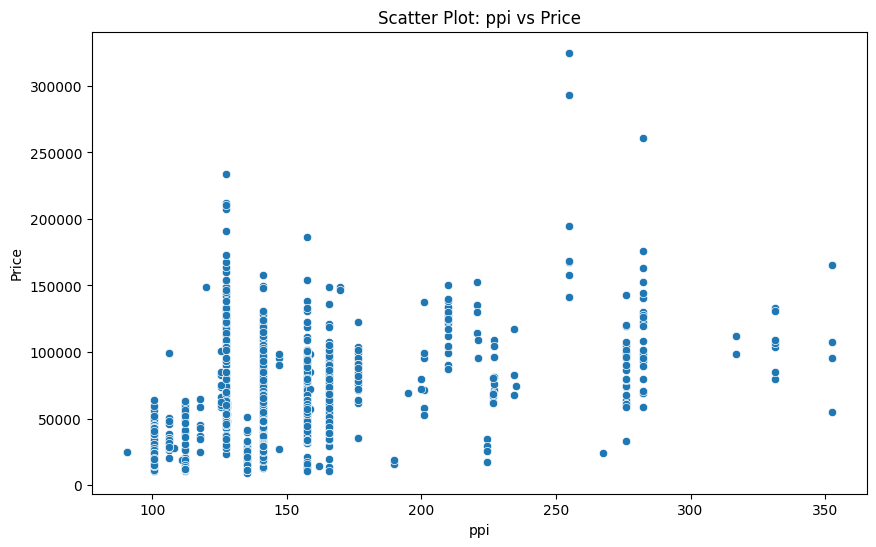

In [91]:
bivariate_processor.run_analysis(df, 'ppi', 'Price')

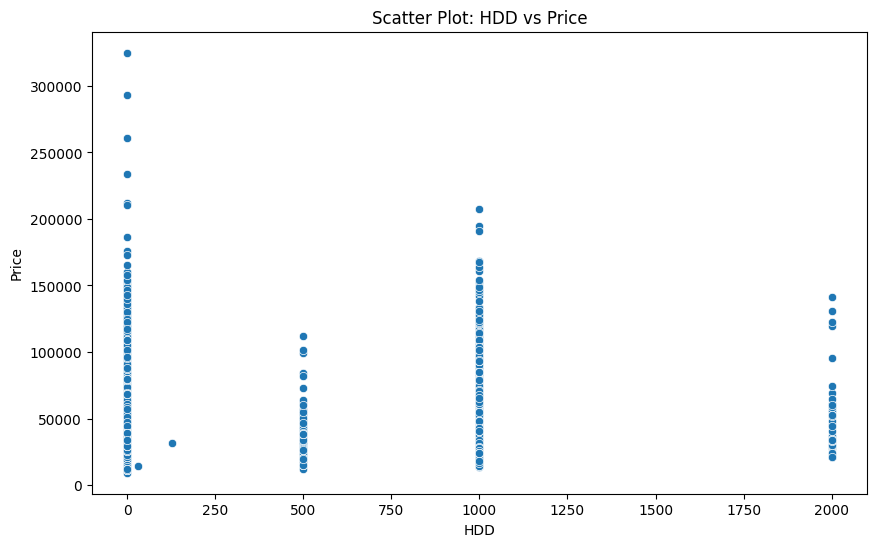

In [92]:
bivariate_processor.run_analysis(df, 'HDD', 'Price')

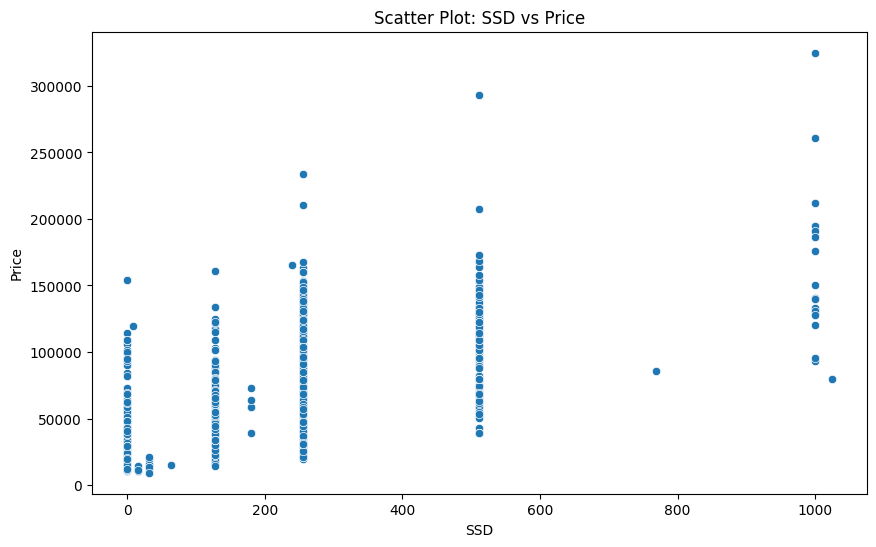

In [93]:
bivariate_processor.run_analysis(df, 'SSD', 'Price')

In [94]:
bivariate_processor.run_analysis(df, 'Gpu brand', 'Price')

Both 'Gpu brand' and 'Price' must be numerical features.


In [95]:
bivariate_processor.run_analysis(df, 'Operating System', 'Price')

Feature 'Operating System' or 'Price' not found in the dataset.


In [96]:
bivariate_processor.run_analysis(df, 'Company', 'Price')

Both 'Company' and 'Price' must be numerical features.


In [97]:
bivariate_processor.run_analysis(df, 'TypeName', 'Price')

Both 'TypeName' and 'Price' must be numerical features.


## Bivariate Analysis Report

### 1. Numeric Features vs Price

- **RAM, SSD, and display quality (PPI)**: Strong positive relationship with price. Higher RAM, larger SSD, and higher-resolution displays tend to be associated with more expensive laptops.  
- **Weight, Touchscreen, IPS**: Mild positive relationship with price. Heavier or touchscreen laptops with IPS displays may slightly increase price.  
- **HDD**: Weak or negative relationship. Traditional hard drives generally appear in lower-priced laptops.  

**Implications for ML Pipeline:**

- Strongly predictive numeric features should be prioritized for regression models.  
- Weakly correlated features may be retained for incremental improvements or removed for model simplicity.  
- Scaling may be needed for numeric features with varying ranges.

---

### 2. Categorical Features vs Price

#### Company
- Premium brands generally command higher prices, while mainstream or budget brands are associated with lower prices.  
- Company acts as a proxy for brand value and product positioning.

#### TypeName
- High-performance types such as Workstations and Gaming laptops are priced higher, whereas Notebook and Netbook types are more affordable.  
- Laptop type is a strong predictor for price segmentation.

#### CPU Brand
- Higher-end CPUs (e.g., Intel Core i7) are linked to higher-priced laptops; entry-level CPUs are found in budget laptops.  
- CPU captures performance-based pricing.

#### GPU Brand
- Dedicated GPUs (e.g., Nvidia) are found in higher-priced laptops; integrated GPUs (Intel/AMD) are associated with mid-range or low-priced laptops.  
- GPU type is critical for gaming and workstation laptops.

#### Operating System
- Mac laptops are typically higher-priced compared to Windows or Linux alternatives.  
- OS is a strong categorical predictor reflecting product ecosystem and premium positioning.

---

### 3. Machine Learning Pipeline Implications

1. **Feature Selection**
   - Retain strongly predictive numeric features (RAM, SSD, PPI) and categorical features (Company, TypeName, CPU, GPU, OS).  
   - Weak features (HDD, Weight) may be optionally dropped depending on model complexity.

2. **Encoding**
   - Categorical features should be properly encoded (one-hot or target encoding) to allow model to capture relationships with Price.

3. **Scaling**
   - Normalize numeric features for models sensitive to magnitude differences (linear models, neural networks).  

4. **Modeling Strategy**
   - Tree-based models (Random Forest, XGBoost, CatBoost) are likely to handle mixed numeric/categorical features effectively.  
   - Linear models may need feature engineering to capture categorical effects.

5. **Outlier Handling**
   - Some premium brands or workstation models are priced significantly higher. Consider robust regression or log-transformed target to reduce skew impact.

---

**Conclusion:**  
Bivariate analysis highlights that both numeric specifications (RAM, SSD, display) and categorical factors (Brand, Laptop Type, CPU/GPU, OS) are key drivers of laptop price. Proper preprocessing and feature encoding are crucial to leverage these relationships effectively in machine learning models.


## Multivariate Analysis


Columns selected for analysis: ['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD', 'os']


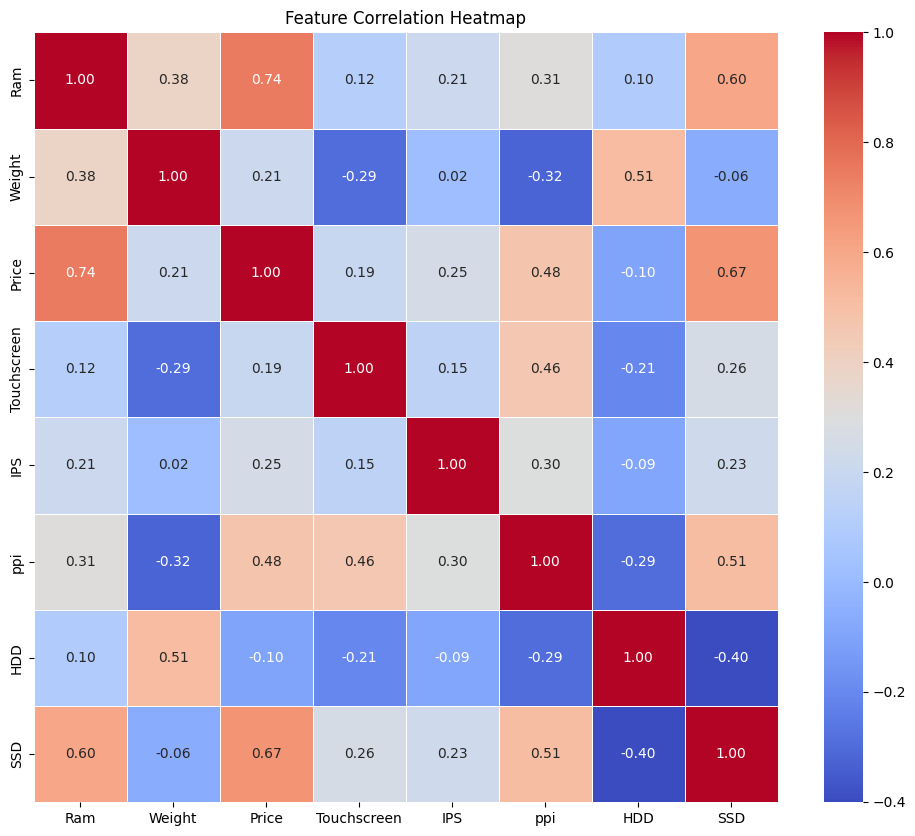

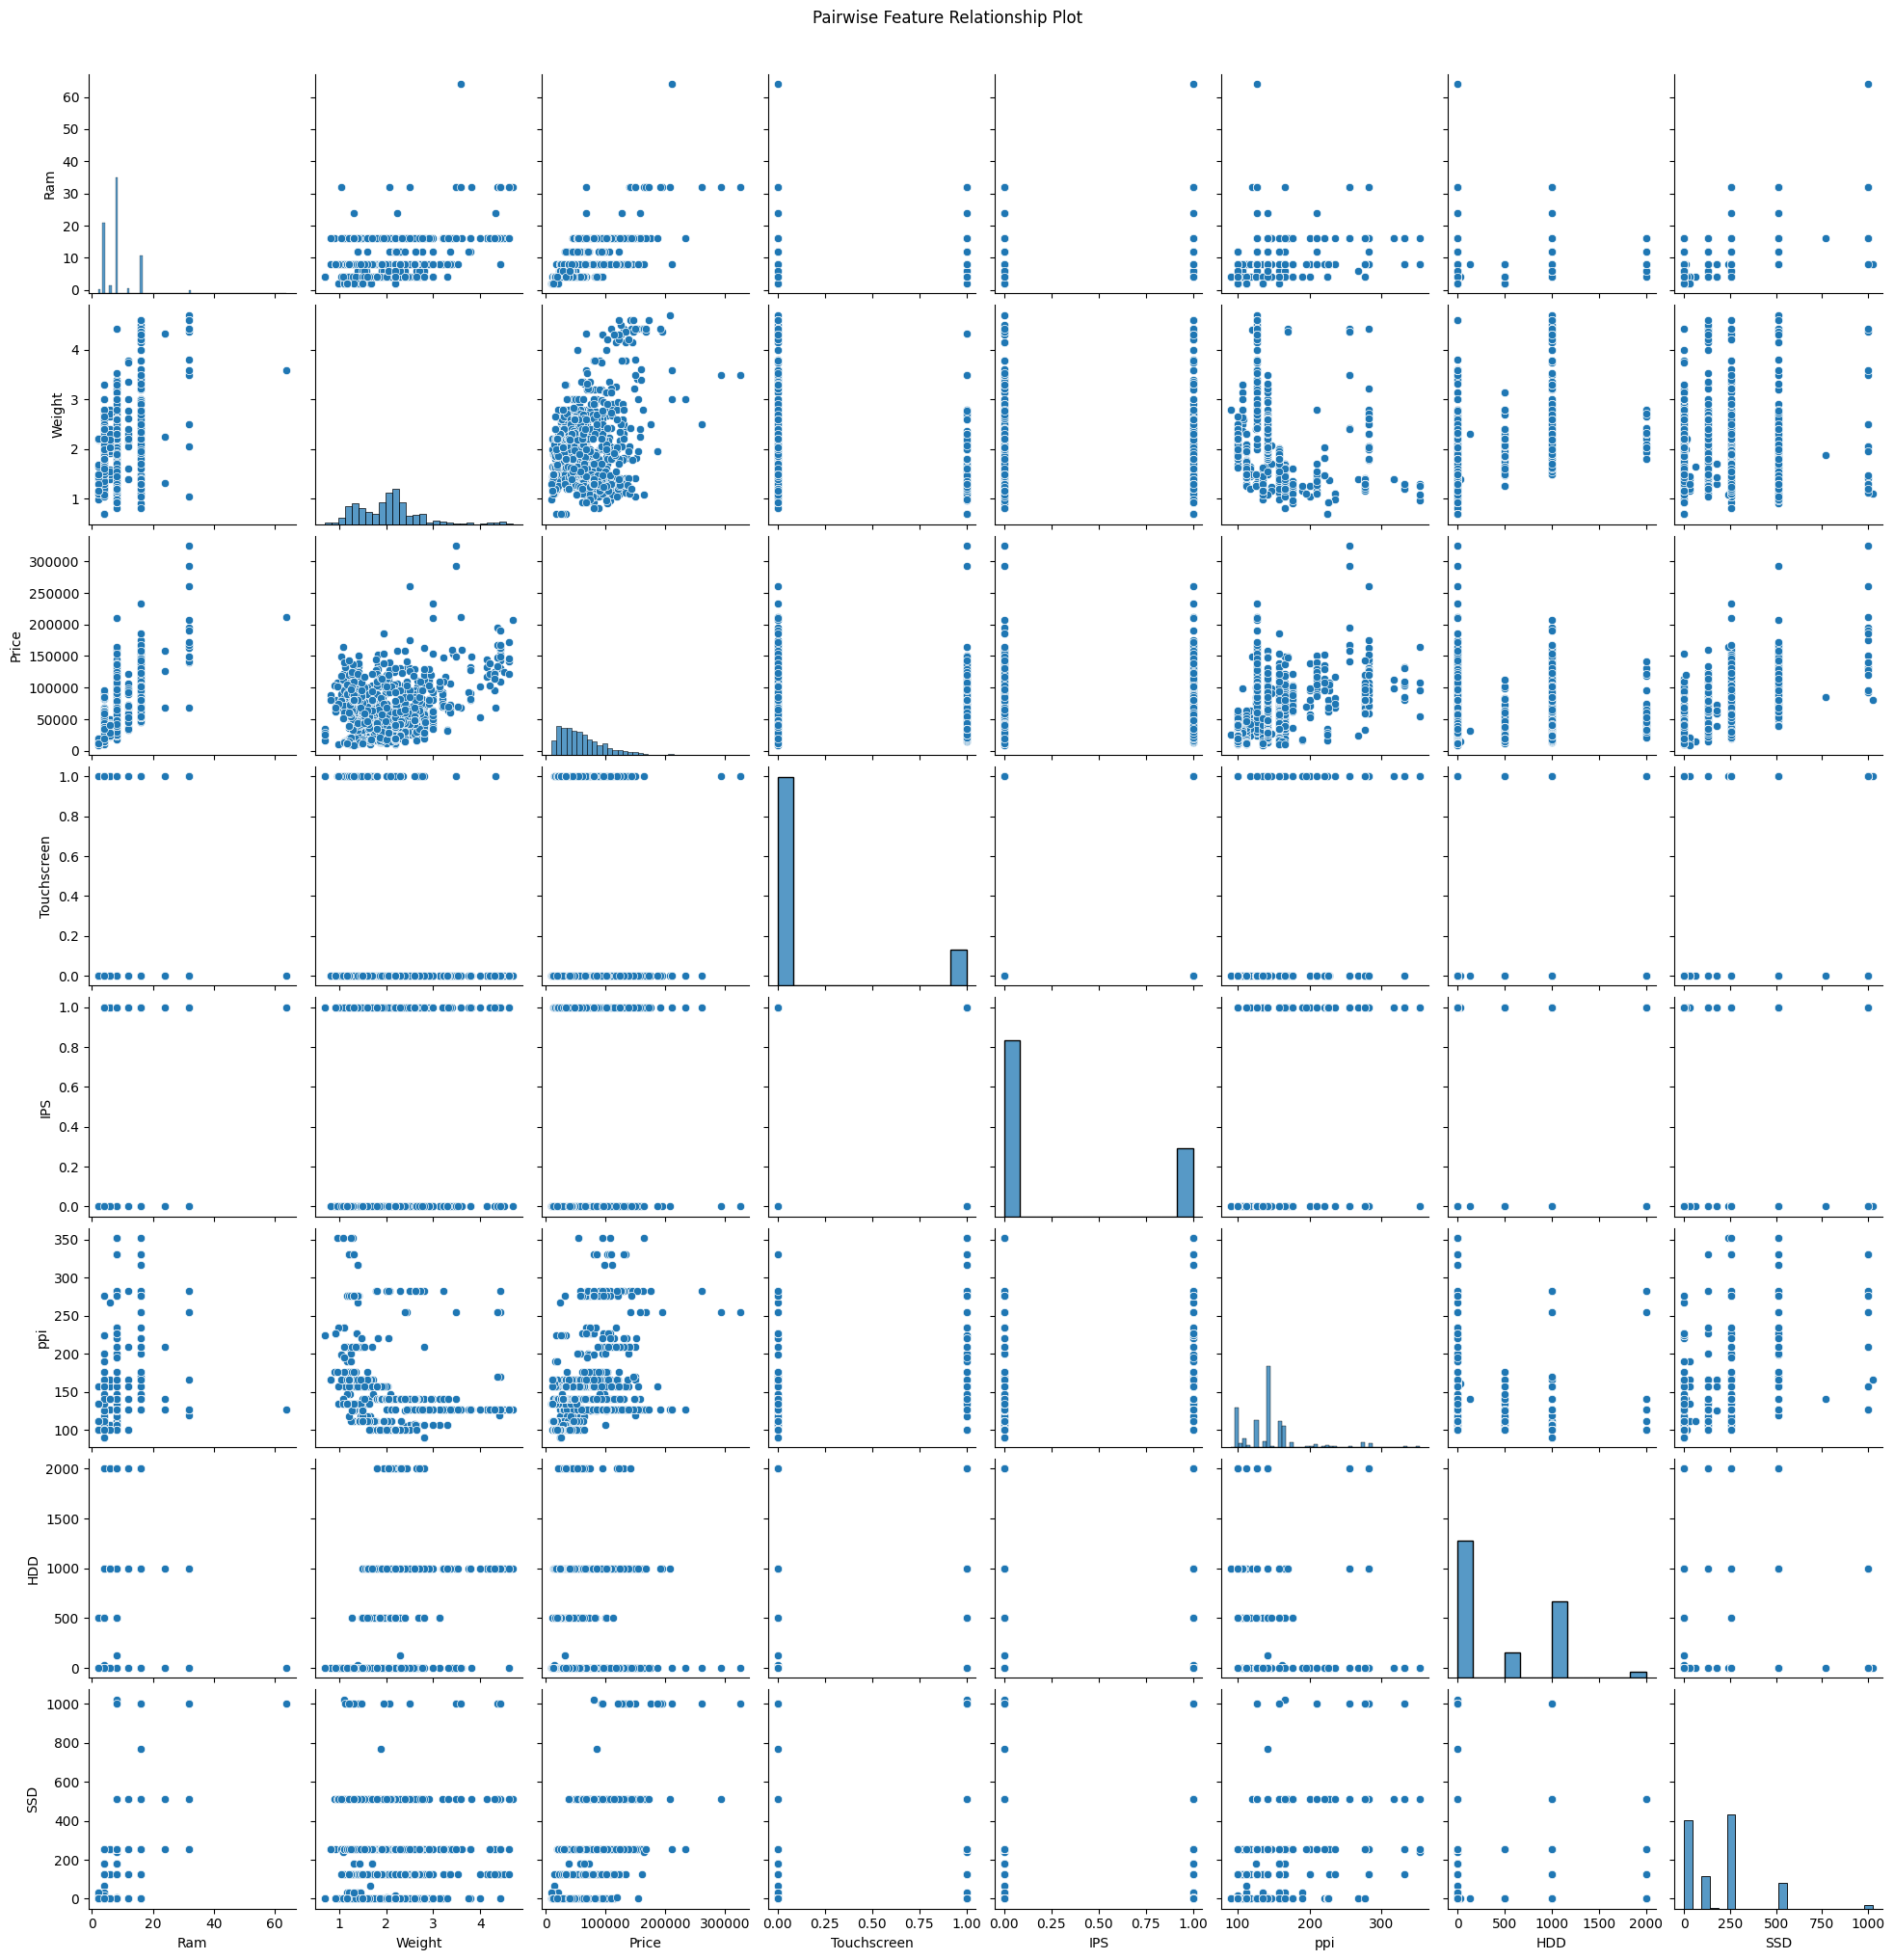

In [99]:
multivariate_processor = SimpleMultivariateStatisticalAnalysis()

# List of desired columns
desired_columns = ['Company', 'TypeName', 'Ram', 'Weight', 'Price',
                   'Touchscreen', 'IPS', 'ppi', 'Cpu', 'brand',
                   'HDD', 'SSD', 'Gpu', 'os']

# Filter only the columns that exist in df
existing_columns = [col for col in desired_columns if col in df.columns]

print("Columns selected for analysis:", existing_columns)

# Select the features safely
selected_features = df[existing_columns]

# Run the analysis
multivariate_processor.render(selected_features)


## Multivariate Analysis Report – Modeling Impact

### Objective
To understand **how multiple laptop features jointly influence pricing and product segmentation**, with a focus on **implications for predictive modeling and feature selection**.

---

### 1. Correlation Overview – Implications for Modeling
- **Price** is strongly influenced by **RAM** and **SSD capacity**, indicating these features are **key predictors** for regression or pricing models.  
- **RAM and SSD** co-variation suggests potential **multicollinearity**; careful feature engineering (e.g., combining into a composite performance score) may improve model stability.  
- **Weight** shows weak or negative correlations with performance, meaning it may provide **non-linear or interaction effects** rather than a direct linear contribution.  
- **HDD** negatively correlates with SSD and display quality, serving as a **segmenting feature** for classification tasks (premium vs. utility laptops).

---

###  2. Display and Performance Interactions
- **Touchscreen and IPS** often co-occur — models capturing **interaction terms** or **multi-hot encoding** for display features could improve predictive accuracy.  
- **PPI** aligns with premium displays, suggesting a **continuous predictor for price modeling**.  
- Including these display features helps models **capture both technical and user-perceived value**, improving price prediction in high-end segments.

---

###  3. Storage Dynamics
- **HDD vs SSD** is a **binary segmentation feature**; models can use this as a **strong categorical predictor**.  
- **SSD capacity** has a direct influence on price, making it a **high-importance variable** in predictive models.  
- Clear separation between HDD and SSD users can also enhance **classification-based clustering or market segmentation models**.

---

###  4. RAM and Processing Power Influence
- **RAM** is a robust predictor for high-performance laptops, aligning with **SSD, Price, and Display resolution**.  
- **Interaction terms between RAM and SSD** may improve regression accuracy by capturing **combined performance effects**.  
- Weight may serve as a secondary predictor through **non-linear relationships**, particularly for ultrabooks and premium lightweight devices.

---

###  5. Visual Patterns – Modeling Insight
- **Pair plots** reveal clusters useful for **unsupervised modeling**:  
  - High-performance laptops form **distinct clusters** in Price vs. RAM and Price vs. SSD.  
  - **Display features** (Touchscreen, IPS) create categorical clusters in mid-to-high price segments.  
  - Weight vs. Price shows **non-linear patterns**, suggesting potential for **tree-based models** like Random Forests or Gradient Boosting.

---

###  6. Multivariate Interpretation for Modeling
- Two latent clusters emerge, guiding **segmentation-based approaches**:  
  1. **Performance-driven laptops** — high RAM, SSD, IPS, Touchscreen; lightweight and expensive.  
  2. **Utility-focused laptops** — larger HDD, lower display quality, moderate prices.  
- Incorporating cluster membership as a **feature** can improve **price prediction** and **recommendation systems**.

---

###  7. Strategic Modeling Insights
- **RAM and SSD upgrades** are the most consistent predictors of premium pricing.  
- **Display technologies (IPS, Touchscreen)** contribute additional predictive value for high-end models but have limited interaction with raw performance features.  
- **Storage configuration (HDD vs SSD)** is a decisive **categorical segmentation factor**, enhancing model interpretability and accuracy.

---

**Conclusion**
The multivariate analysis highlights **performance, display, and storage** as the dominant dimensions shaping laptop pricing. For predictive modeling:  
- Focus on **RAM, SSD, and display features** as primary predictors.  
- Consider **interaction terms and cluster features** for enhanced model performance.  
- Leverage **tree-based or non-linear models** to capture diverse patterns across premium and budget segments.
